In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import tensorflow as tf

DATA PREPROCESSING

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/BTP/data.csv')
print(dataset)

       Unnamed: 0   X1   X2   X3   X4   X5  ...  X174  X175  X176  X177  X178  y
0      X21.V1.791  135  190  229  223  192  ...  -103  -127  -116   -83   -51  4
1      X15.V1.924  386  382  356  331  320  ...   157   156   154   143   129  1
2         X8.V1.1  -32  -39  -47  -37  -32  ...   -12   -30   -35   -35   -36  5
3       X16.V1.60 -105 -101  -96  -92  -89  ...   -85   -77   -72   -69   -65  5
4       X20.V1.54   -9  -65  -98 -102  -78  ...   -41   -65   -83   -89   -73  5
5       X14.V1.56   55   28   18   16   16  ...   -60   -64   -60   -56   -55  5
6       X3.V1.191  -55   -9   52  111  135  ...   -41   -26    11    67   128  4
7      X11.V1.273    1   -2   -8  -11  -12  ...   -76   -72   -66   -57   -39  2
8      X19.V1.874 -278 -246 -215 -191 -177  ...  -226  -174  -125   -79   -40  1
9       X3.V1.491    8   15   13    3   -6  ...   -17   -19   -15   -15   -11  4
10        X3.V1.6   -5   15   28   28    9  ...   -16   -74  -101   -89   -49  5
11     X21.V1.724 -167 -230 

In [0]:
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [0]:
dataset.shape

(11500, 180)

In [0]:
dataset.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,...,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,...,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,...,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,...,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55,3
11499,X16.V1.210,29,41,57,72,74,62,54,43,31,23,13,11,-3,-5,-9,-14,1,27,60,69,69,50,33,20,15,4,-5,-4,-8,-15,-13,-2,21,39,48,37,10,-23,-47,...,-108,-83,-46,0,30,39,44,33,22,8,-13,-33,-61,-70,-75,-74,-58,-18,19,54,71,76,74,65,56,18,-28,-75,-98,-94,-59,-25,-4,2,5,4,-2,2,20,4


In [0]:
dataset.ndim

2

In [0]:
dataset.dtypes

Unnamed: 0    object
X1             int64
X2             int64
X3             int64
X4             int64
X5             int64
X6             int64
X7             int64
X8             int64
X9             int64
X10            int64
X11            int64
X12            int64
X13            int64
X14            int64
X15            int64
X16            int64
X17            int64
X18            int64
X19            int64
X20            int64
X21            int64
X22            int64
X23            int64
X24            int64
X25            int64
X26            int64
X27            int64
X28            int64
X29            int64
               ...  
X150           int64
X151           int64
X152           int64
X153           int64
X154           int64
X155           int64
X156           int64
X157           int64
X158           int64
X159           int64
X160           int64
X161           int64
X162           int64
X163           int64
X164           int64
X165           int64
X166         

In [0]:
dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,-5.827478,-6.042174,-6.687304,-7.088870,-7.211217,-7.088261,-6.806696,-6.744696,-6.484783,-6.448435,-6.355391,-6.543130,-6.884348,-6.883217,-6.118870,-5.15913,-4.785652,-4.874783,-5.393565,-5.935478,-6.349913,-6.212522,-5.859826,-5.299826,-4.955652,-5.278087,-6.162261,-7.316609,-7.998522,-7.818870,...,-6.997304,-7.339391,-7.911565,-8.177304,-8.608870,-8.578087,-8.240000,-7.691391,-7.356522,-7.228783,-6.980870,-6.756783,-6.355304,-6.423826,-6.465217,-6.316435,-5.808000,-5.255913,-4.682087,-4.638609,-4.770261,-5.650870,-7.170348,-8.759826,-9.784783,-10.096261,-9.842957,-9.701739,-9.351391,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,160.471017,161.181118,165.071121,169.198359,170.641967,168.930355,164.646296,162.062661,162.571333,162.339911,162.823325,163.909723,165.844176,166.009100,164.715153,162.77423,162.902294,164.799831,165.391697,164.291120,163.165167,163.408052,163.561408,162.548119,160.813772,160.441049,162.881958,166.235164,166.314965,164.513017,...,168.567495,168.662705,167.643458,167.414439,167.922773,168.274009,167.808218,166.739558,165.678558,167.130911,168.156296,167.459868,165.061414,164.248830,166.226332,168.143625,167.067064,166.446540,167.554020,169.418457,170.639171,170.817824,168.145372,166.817974,166.999981,167.756860,166.988820,167.062497,166.606345,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,-1765.000000,-1803.000000,-1833.000000,-1867.000000,-1870.000000,-1839.000000,-1867.000000,-1856.000000,-1844.000000,-1717.000000,-1764.000000,-1856.000000,-1844.000000,-1866.000000,-1863.000000,-1866.00000,-1781.000000,-1860.000000,-1818.000000,-1867.000000,-1743.000000,-1517.000000,-1552.000000,-1720.000000,-1864.000000,-1814.000000,-1829.000000,-1851.000000,-1840.000000,-1673.000000,...,-1867.000000,-1826.000000,-1866.000000,-1854.000000,-1789.000000,-1872.000000,-1866.000000,-1675.000000,-1778.000000,-1733.000000,-1862.000000,-1861.000000,-1857.000000,-1839.000000,-1860.000000,-1843.000000,-1863.000000,-1861.000000,-1845.000000,-1820.000000,-1864.000000,-1868.000000,-1855.000000,-1852.000000,-1870.000000,-1847.000000,-1578.000000,-1838.000000,-1763.0000

In [0]:
dataset = dataset.iloc[:, 1:]
print(dataset)

        X1   X2   X3   X4   X5   X6   X7  ...  X173  X174  X175  X176  X177  X178  y
0      135  190  229  223  192  125   55  ...   -77  -103  -127  -116   -83   -51  4
1      386  382  356  331  320  315  307  ...   152   157   156   154   143   129  1
2      -32  -39  -47  -37  -32  -36  -57  ...    19   -12   -30   -35   -35   -36  5
3     -105 -101  -96  -92  -89  -95 -102  ...   -77   -85   -77   -72   -69   -65  5
4       -9  -65  -98 -102  -78  -48  -16  ...   -32   -41   -65   -83   -89   -73  5
5       55   28   18   16   16   19   25  ...   -54   -60   -64   -60   -56   -55  5
6      -55   -9   52  111  135  129  103  ...   -62   -41   -26    11    67   128  4
7        1   -2   -8  -11  -12  -17  -15  ...   -88   -76   -72   -66   -57   -39  2
8     -278 -246 -215 -191 -177 -167 -157  ...  -281  -226  -174  -125   -79   -40  1
9        8   15   13    3   -6   -8   -5  ...    -5   -17   -19   -15   -15   -11  4
10      -5   15   28   28    9  -29  -41  ...    16   -16   -74  

In [0]:
X = []
for i in range(11500):
  temp = dataset.iloc[i, :]
  temp = list(temp)
  X.append(temp)

In [0]:
for i in range(11500):
  if (X[i][len(X[i]) - 1] != 1):
    X[i][len(X[i]) - 1] = 0
print(X[len(X) - 1])

[29, 41, 57, 72, 74, 62, 54, 43, 31, 23, 13, 11, -3, -5, -9, -14, 1, 27, 60, 69, 69, 50, 33, 20, 15, 4, -5, -4, -8, -15, -13, -2, 21, 39, 48, 37, 10, -23, -47, -71, -80, -74, -59, -44, -30, -17, -3, 6, 13, 20, 22, 20, 14, -15, -38, -53, -62, -69, -77, -75, -85, -87, -76, -66, -59, -42, -29, -19, -19, -27, -37, -39, -26, -7, -5, -18, -36, -54, -66, -52, -37, -6, 20, 47, 47, 37, 27, 19, 17, 12, 8, -11, -34, -31, -19, 4, 27, 66, 94, 110, 107, 93, 84, 83, 94, 65, 17, -38, -65, -61, -36, -2, 9, 25, 38, 56, 70, 70, 58, 27, -1, -12, -24, -50, -73, -80, -70, -37, 7, 49, 65, 64, 44, 15, -14, -38, -68, -99, -107, -108, -83, -46, 0, 30, 39, 44, 33, 22, 8, -13, -33, -61, -70, -75, -74, -58, -18, 19, 54, 71, 76, 74, 65, 56, 18, -28, -75, -98, -94, -59, -25, -4, 2, 5, 4, -2, 2, 20, 0]


In [0]:
X = pd.DataFrame(X)
print(X)

       0    1    2    3    4    5    6    ...  172  173  174  175  176  177  178
0      135  190  229  223  192  125   55  ...  -77 -103 -127 -116  -83  -51    0
1      386  382  356  331  320  315  307  ...  152  157  156  154  143  129    1
2      -32  -39  -47  -37  -32  -36  -57  ...   19  -12  -30  -35  -35  -36    0
3     -105 -101  -96  -92  -89  -95 -102  ...  -77  -85  -77  -72  -69  -65    0
4       -9  -65  -98 -102  -78  -48  -16  ...  -32  -41  -65  -83  -89  -73    0
5       55   28   18   16   16   19   25  ...  -54  -60  -64  -60  -56  -55    0
6      -55   -9   52  111  135  129  103  ...  -62  -41  -26   11   67  128    0
7        1   -2   -8  -11  -12  -17  -15  ...  -88  -76  -72  -66  -57  -39    0
8     -278 -246 -215 -191 -177 -167 -157  ... -281 -226 -174 -125  -79  -40    1
9        8   15   13    3   -6   -8   -5  ...   -5  -17  -19  -15  -15  -11    0
10      -5   15   28   28    9  -29  -41  ...   16  -16  -74 -101  -89  -49    0
11    -167 -230 -280 -315 -3

In [0]:
print(X.shape)
Y = X.iloc[:, -1]
X = X.iloc[:, : -1]
print(X.shape)
print(Y.shape)
#print(Y)

(11500, 179)
(11500, 178)
(11500,)


In [0]:
X_train = X.iloc[:10350, :]
X_test = X.iloc[10350: , :]
print(X_train.shape)
print(X_test.shape)


(10350, 178)
(1150, 178)


In [0]:
Y = list(Y)
Y_temp = []
for i in range(len(Y)):
  temp = []
  if Y[i] == 1:
    temp = [0.0, 1.0]
  else:
    temp = [1.0, 0.0]
  Y_temp.append(temp)
Y = Y_temp

In [0]:
Y_train = Y[:10350]
Y_test = Y[10350:]
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)
print(Y_train.shape)
print(Y_test.shape)

(10350, 2)
(1150, 2)


BUILDING THE NETWORK

In [0]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
import matplotlib.pyplot as plt

In [0]:
model = Sequential()
model.add(Dense(input_dim = 178, activation='sigmoid', output_dim = 100))
model.add(Dropout(0.1))
model.add(Dense(input_dim = 100, activation='sigmoid', output_dim = 2))
model.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=178, activation="sigmoid", units=70)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=70, activation="sigmoid", units=2)`
  after removing the cwd from sys.path.


In [0]:
from keras import optimizers
sgd = optimizers.SGD(lr = 0.09)

In [0]:
model.compile(optimizer='sgd', loss = 'mean_squared_error', metrics=['accuracy'])

In [0]:
Y_train.shape

(10350, 2)

Train on 9315 samples, validate on 1035 samples
Epoch 1/50
9315/9315 [==============================] - 13s 1ms/step - loss: 0.1612 - acc: 0.7996 - val_loss: 0.1579 - val_acc: 0.8010
Epoch 2/50
9315/9315 [==============================] - 12s 1ms/step - loss: 0.1572 - acc: 0.8006 - val_loss: 0.1554 - val_acc: 0.8010
Epoch 3/50
9315/9315 [==============================] - 12s 1ms/step - loss: 0.1542 - acc: 0.8006 - val_loss: 0.1522 - val_acc: 0.8010
Epoch 4/50
9315/9315 [==============================] - 12s 1ms/step - loss: 0.1512 - acc: 0.8006 - val_loss: 0.1503 - val_acc: 0.8010
Epoch 5/50
9315/9315 [==============================] - 12s 1ms/step - loss: 0.1468 - acc: 0.8006 - val_loss: 0.1434 - val_acc: 0.8010
Epoch 6/50
9315/9315 [==============================] - 12s 1ms/step - loss: 0.1385 - acc: 0.8006 - val_loss: 0.1385 - val_acc: 0.8010
Epoch 7/50
9315/9315 [==============================] - 13s 1ms/step - loss: 0.1329 - acc: 0.8006 - val_loss: 0.1349 - val_acc: 0.8010
Epoch 8

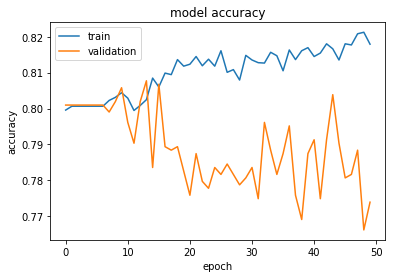

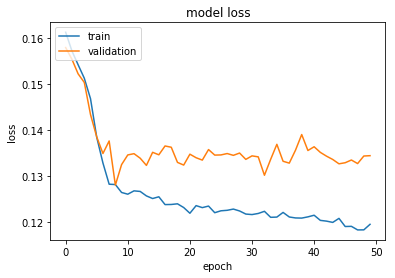

In [0]:
history = model.fit(x = X_train.values, y = Y_train.values, batch_size = 1, epochs = 50 , validation_split=0.1)

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
a = model.evaluate(x = X_test.values, y = Y_test.values, batch_size = 1)
a

1150/1150 [==============================] - 1s 680us/step


[0.13827869335442539, 0.7843478260869565]

In [0]:
y_predicted = model.predict(x = X_test.values)

In [0]:
y_predicted1 = []
for i in range(len(y_predicted)):
  temp = []
  if (y_predicted[i][0] > y_predicted[i][1]):
    temp = [1., 0.]
  else:
    temp = [0., 1.]
  y_predicted1.append(temp)
y_predicted = y_predicted1
print(y_predicted)

[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.

In [0]:
Y_true = []
Y_pred = []
for i in range(len(y_predicted)):
  temp1 = y_predicted[i]
  temp2 = Y_test[i]
  if (temp1[0] == 0.0 and temp1[1] == 1.0):
    Y_pred.append(1)
  if (temp1[0] == 1.0 and temp1[1] == 0.0):
    Y_pred.append(0)
  if (temp2[0] == 0.0 and temp2[1] == 1.0):
    Y_true.append(1)
  if (temp2[0] == 1.0 and temp2[1] == 0.0):
    Y_true.append(0)
print(Y_true)
print(Y_pred)

KeyError: ignored

In [0]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_true, Y_pred)
print(conf_mat)

In [0]:
model.summary()

In [0]:
input_nodes = 178
output_nodes = 2
hidden_nodes = 100

In [0]:
batch_size = 10
epochs = 805
learning_rate = 0.001

In [0]:
x = tf.placeholder(tf.float32, [None, input_nodes])
y = tf.placeholder(tf.float32, [None, output_nodes])
print(x.shape)
weights = {
    'hidden' : tf.Variable(tf.random_normal([input_nodes, hidden_nodes])),
    'output' : tf.Variable(tf.random_normal([hidden_nodes, output_nodes]))
}
biases = {
    'hidden' : tf.Variable(tf.random_normal([hidden_nodes])),
    'output' : tf.Variable(tf.random_normal([output_nodes]))
}
hidden_layer_output = tf.add(tf.matmul(x, weights['hidden']), biases['hidden'])
hidden_layer_output = tf.nn.relu(hidden_layer_output)

output_layer_output = tf.add(tf.matmul(hidden_layer_output, weights['output']), biases['output'])
output_layer_output = tf.nn.sigmoid(output_layer_output)

cost_function = tf.square(y - output_layer_output)
cost_function = tf.reduce_mean(cost_function)

optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost_function)

INITIALIZING THE VARIABLES

In [0]:
init = tf.global_variables_initializer()